In [1]:
import pandas as pd
import utils
import seaborn as sns
import matplotlib.pyplot as plt

Check MYT1-RNF41 connections at the replicate level

In [2]:
orf_profiles_df = pd.read_parquet(
    "../profiles/profiles_wellpos_cc_var_mad_outlier_featselect_sphering_harmony.parquet"
)

orf_profiles_df.head()

,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_JCP2022,X_1,X_2,X_3,X_4,X_5,X_6,...,X_713,X_714,X_715,X_716,X_717,X_718,X_719,X_720,X_721,X_722
0,source_4,BR00117035,A01,JCP2022_905588,0.052849,0.243130,-0.025814,1.463608,0.118261,0.768867,...,0.007945,0.231715,-0.439640,-0.272064,-0.326058,-0.315760,1.113890,2.681547,0.556489,-1.012824
1,source_4,BR00117035,K16,JCP2022_904671,0.291435,0.856620,-0.087470,0.829247,-0.260318,0.096628,...,0.041054,0.183351,-0.082316,-0.021600,-0.314601,-0.093980,-0.768527,0.122399,-0.206554,-0.124473
2,source_4,BR00117035,K15,JCP2022_910002,1.051215,0.050609,0.055375,-0.892842,-0.293192,0.241954,...,0.817725,-0.560760,-0.493579,-0.743412,-0.308875,-0.698211,0.117192,0.416552,-0.220121,0.597348
3,source_4,BR00117035,K14,JCP2022_915130,-0.926487,0.877830,-0.176330,0.490574,-0.092425,0.312627,...,0.156092,-0.090704,-0.229331,0.215088,-0.142982,0.212413,-0.570515,-0.104503,-0.228382,0.419602
4,source_4,BR00117035,K13,JCP2022_907169,-0.454818,0.058401,0.453824,-0.760628,-0.782859,0.467273,...,0.623233,-0.210110,-0.600980,-0.397738,-0.594362,-0.354290,-0.155720,0.191323,0.011434,-0.229435


In [3]:
orf_metadata_df = pd.read_csv(
    "../00.download-and-process-annotations/output/orf_metadata.tsv.gz",
    sep="\t",
    usecols=["Metadata_JCP2022", "Metadata_Symbol"],
)
orf_metadata_df.head()

,Metadata_JCP2022,Metadata_Symbol
0,JCP2022_900001,NaN
1,JCP2022_900002,NAT1
2,JCP2022_900003,AANAT
3,JCP2022_900004,ABAT
4,JCP2022_900005,ACADVL


In [4]:
orf_profiles_df = orf_profiles_df.merge(
    orf_metadata_df, on="Metadata_JCP2022", how="inner"
).query('Metadata_Symbol=="MYT1" or Metadata_Symbol=="RNF41"')

orf_profiles_df

,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_JCP2022,X_1,X_2,X_3,X_4,X_5,X_6,...,X_714,X_715,X_716,X_717,X_718,X_719,X_720,X_721,X_722,Metadata_Symbol
13285,source_4,BR00121547,C03,JCP2022_902199,0.790947,0.340681,0.353621,-0.139256,-0.085210,0.309761,...,-0.216062,-0.072261,0.053150,-1.233858,-0.216214,-0.216134,0.055252,0.662488,-0.475779,RNF41
13286,source_4,BR00121548,C03,JCP2022_902199,1.456350,-0.022168,1.032135,0.059142,-0.788467,-0.336951,...,0.196056,0.154297,-0.024582,-1.421476,-0.122930,-0.412375,0.026178,0.551593,-0.432554,RNF41
13287,source_4,BR00121549,C03,JCP2022_902199,0.494793,-0.129504,0.178259,0.950581,-0.575985,0.480338,...,0.088754,-0.108999,-0.308178,-1.280444,-0.068300,-0.471226,0.041938,0.262599,-0.663147,RNF41
13288,source_4,BR00121550,C03,JCP2022_902199,-0.624127,0.194719,0.679070,-1.225201,-0.378428,-0.257654,...,-0.086186,-0.072997,0.112969,-1.709486,-0.111991,-0.483183,0.235699,0.634475,-0.449450,RNF41
13289,source_4,BR00121551,C03,JCP2022_902199,-1.280270,1.792718,0.755051,-1.141219,-0.562895,-0.184076,...,-0.163508,-0.134373,-0.266418,-1.028338,-0.094466,-0.354746,-0.047302,0.337652,-0.609660,RNF41
15665,source_4,BR00121562,I08,JCP2022_910239,-0.885694,0.572118,-0.480118,0.711251,-0.083313,0.097760,...,1.008334,0.337662,0.180112,1.577976,0.036992,-0.498505,-0.063101,-0.518858,0.028692,MYT1
15666,source_4,BR00121563,I08,JCP2022_910239,-0.170320,0.387835,-0.733217,-0.526642,0.302022,-1.394500,...,0.253811,0.424543,0.049693,0.645513,0.197462,0.448109,0.015352,-0.064350,-0.190663,MYT1
15667,source_4,BR00121564,I08,JCP2022_910239,-0.943809,1.496020,-0.210119,0.115617,0.358177,-0.810386,...,-0.004698,0.328033,0.108390,0.206710,0.176505,0.296270,-0.396145,-0.289267,-0.076682,MYT1
15668,source_4,BR00121565,I08,JCP2022_910239,-1.043714,1.776968,-0.633081,-0.561837,0.357193,0.023450,...,0.102484,0.187234,-0.053777,0.370321,-0.186957,0.423906,-0.215631,-0.217814,-0.894265,MYT1
15669,source_4,BR00121566,I08,JCP2022_910239,0.213164,0.258971,-0.485078,0.466362,0.256907,-0.255669,...,0.360118,0.471653,0.342744,0.368243,0.064673,0.031206,-0.292007,-0.459769,0.326449,MYT1


In [5]:
feature_df = utils.get_featuredata(orf_profiles_df)
feature_values = feature_df.values
id = list(orf_profiles_df["Metadata_Symbol"])

In [6]:
cosine_sim_df = utils.cosine_similarity(
    id,
    feature_values
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
cosine_sim_df.head()

,RNF41,RNF41,RNF41,RNF41,RNF41,MYT1,MYT1,MYT1,MYT1,MYT1
RNF41,1.000000,0.623194,0.481836,0.576382,0.441546,-0.403901,-0.301635,-0.274413,-0.353588,-0.397900
RNF41,0.623194,1.000000,0.535665,0.584283,0.422706,-0.341055,-0.323589,-0.291632,-0.305618,-0.368783
RNF41,0.481836,0.535665,1.000000,0.546259,0.432326,-0.325550,-0.255443,-0.211824,-0.315934,-0.420457
RNF41,0.576382,0.584283,0.546259,1.000000,0.509560,-0.303728,-0.286373,-0.275737,-0.376927,-0.449287
RNF41,0.441546,0.422706,0.432326,0.509560,1.000000,-0.293400,-0.221352,-0.192797,-0.293758,-0.374676


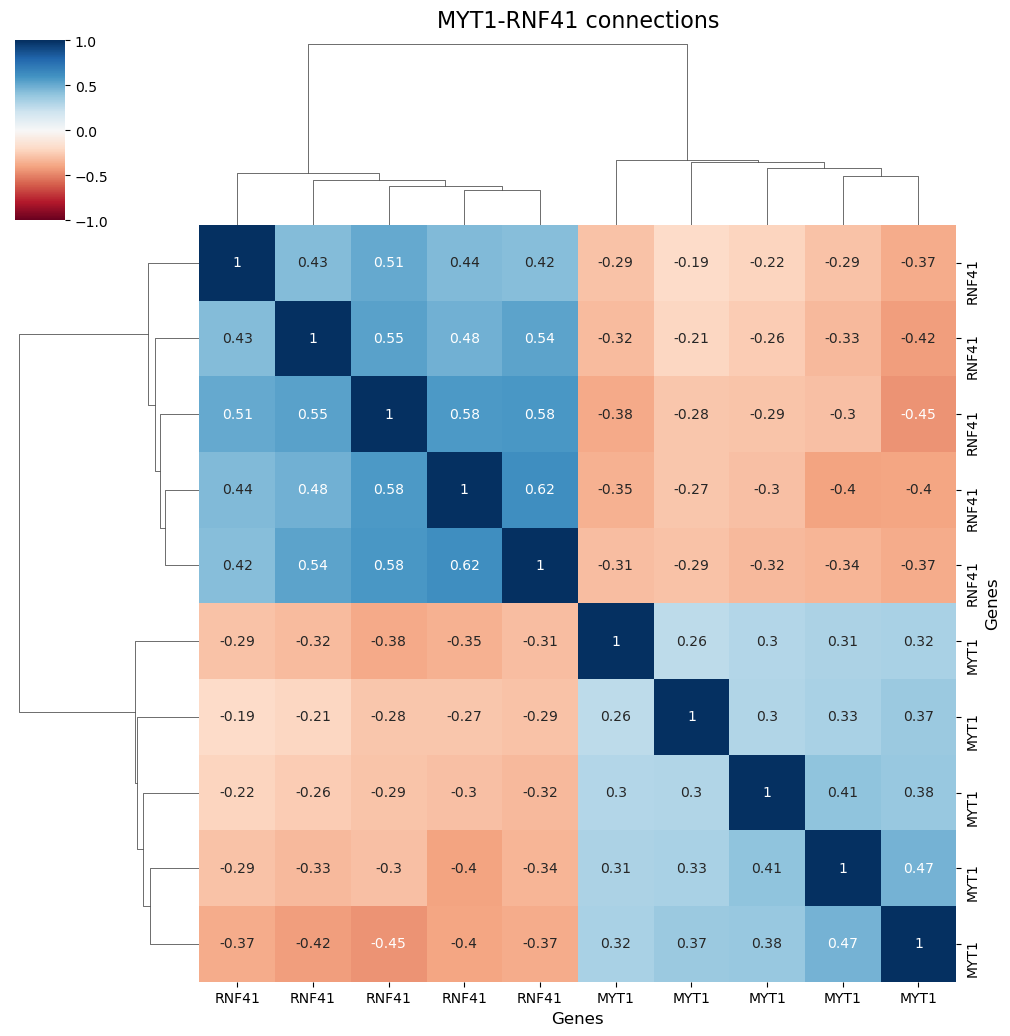

In [8]:
# Plot heatmap

f = sns.clustermap(
    cosine_sim_df,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    xticklabels=True,
    yticklabels=True,
    annot=True,
)

f.ax_heatmap.set(xlabel="Genes", ylabel="Genes")

f.ax_heatmap.xaxis.label.set_size(12)
f.ax_heatmap.yaxis.label.set_size(12)

f.ax_heatmap.set_title("MYT1-RNF41 connections", fontsize=16, y=1.25)

f.savefig("figures/MYT1-RNF41_similarities.png")
f.savefig("figures/MYT1-RNF41_similarities.svg")

In [9]:
orf_profiles_with_feature_names_df = utils.consensus(
    pd.read_parquet("../profiles/profiles_wellpos_cc_var_mad_outlier_orf.parquet")
    .merge(orf_metadata_df, on="Metadata_JCP2022", how="inner")
    .query('Metadata_Symbol=="MYT1" or Metadata_Symbol=="RNF41"'),
    "Metadata_JCP2022",
)

orf_profiles_with_feature_names_df.head()

,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_Symbol,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_BoundingBoxMaximum_X,Cells_AreaShape_BoundingBoxMaximum_Y,Cells_AreaShape_BoundingBoxMinimum_X,...,Nuclei_Texture_Variance_RNA_10_02_256,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256
0,source_4,BR00121547,C03,JCP2022_902199,RNF41,1.226954,1.567175,1.094613,0.062425,0.755202,...,0.877546,0.836630,0.816269,0.814545,0.788805,0.787544,0.824995,0.806911,0.807318,0.807995
1,source_4,BR00121562,I08,JCP2022_910239,MYT1,-0.690802,-1.168962,-1.440234,1.078396,-1.244690,...,-0.291057,-0.584193,-0.275943,-0.404181,-0.408087,-0.369660,-0.342646,-0.428945,-0.430834,-0.439444


In [10]:
feature_names = utils.get_featurecols(orf_profiles_with_feature_names_df)

feature_name_interpretation_df = pd.DataFrame()

for feature_name in feature_names:
    df = pd.DataFrame(utils.parse_cp_features(feature_name), index=[0])
    feature_name_interpretation_df = pd.concat([feature_name_interpretation_df, df], ignore_index=True)

feature_name_interpretation_df.head()

,feature,compartment,feature_group,feature_type,channel
0,Cells_AreaShape_Area,Cells,AreaShape,Area,XNONE
1,Cells_AreaShape_BoundingBoxArea,Cells,AreaShape,BoundingBoxArea,XNONE
2,Cells_AreaShape_BoundingBoxMaximum_X,Cells,AreaShape,BoundingBoxMaximum,XNONE
3,Cells_AreaShape_BoundingBoxMaximum_Y,Cells,AreaShape,BoundingBoxMaximum,XNONE
4,Cells_AreaShape_BoundingBoxMinimum_X,Cells,AreaShape,BoundingBoxMinimum,XNONE


In [11]:
feature_group = "AreaShape"
feature_group_list = ["Texture", "Intensity", "RadialDistribution"]
compartments = ["Cells", "Cytoplasm", "Nuclei"]
channels = ["DNA", "RNA", "Mito", "ER", "AGP"]

In [12]:
compartment_feature_group_df = pd.DataFrame()

for compartment in compartments:
    feature_cols = (
        feature_name_interpretation_df.query("feature_group==@feature_group")
        .query("compartment==@compartment")
        .feature.to_list()
    )
    feature_values = orf_profiles_with_feature_names_df[feature_cols].copy().values
    id = list(orf_profiles_with_feature_names_df["Metadata_Symbol"])

    cosine_sim_df = utils.cosine_similarity(id, feature_values)

    df = pd.DataFrame(
        {
            "Compartment": compartment,
            "Feature_group": feature_group,
            "Similarity": cosine_sim_df.loc[id[0], id[1]],
        },
        index=[0],
    )

    compartment_feature_group_df = pd.concat(
        [compartment_feature_group_df, df], ignore_index=True
    )

compartment_feature_group_df = compartment_feature_group_df.pivot(
    index="Feature_group", columns="Compartment", values="Similarity"
)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
print(compartment_feature_group_df.to_markdown())

| Feature_group   |     Cells |   Cytoplasm |    Nuclei |
|:----------------|----------:|------------:|----------:|
| AreaShape       | -0.600811 |   -0.642041 | -0.698311 |


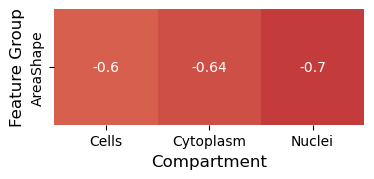

In [14]:
n_row = compartment_feature_group_df.shape[0]
n_col = compartment_feature_group_df.shape[1]
fig_width = n_row + 3
fig_height = 1.5

plt.figure(figsize = (fig_width, fig_height))

f = sns.heatmap(
    compartment_feature_group_df,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    xticklabels=True,
    yticklabels=True,
    annot=True,
    cbar=None,
)

f.set(xlabel="Compartment", ylabel="Feature Group")

f.xaxis.label.set_size(12)
f.yaxis.label.set_size(12)


plt.savefig("figures/MYT1-RNF41_area_size_compartment.png")
plt.savefig("figures/MYT1-RNF41_area_size_compartment.svg")

In [15]:
channel_feature_group_df = pd.DataFrame()

for channel in channels:
    for feature_group in feature_group_list:
        feature_cols = (
            feature_name_interpretation_df.query("feature_group==@feature_group")
            .query("channel==@channel")
            .feature.to_list()
        )
        feature_values = orf_profiles_with_feature_names_df[feature_cols].copy().values
        id = list(orf_profiles_with_feature_names_df["Metadata_Symbol"])

        cosine_sim_df = utils.cosine_similarity(id, feature_values)

        df = pd.DataFrame(
            {
                "Channel": channel,
                "Feature_group": feature_group,
                "Similarity": cosine_sim_df.loc[id[0], id[1]],
            },
            index=[0],
        )

        channel_feature_group_df = pd.concat(
            [channel_feature_group_df, df], ignore_index=True
        )

channel_feature_group_df = channel_feature_group_df.pivot(
    index="Feature_group", columns="Channel", values="Similarity"
)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
print(channel_feature_group_df.to_markdown())

| Feature_group      |       AGP |       DNA |        ER |      Mito |        RNA |
|:-------------------|----------:|----------:|----------:|----------:|-----------:|
| Intensity          | -0.383413 | -0.691115 | -0.774888 | -0.884678 | -0.733105  |
| RadialDistribution | -0.831001 | -0.806229 | -0.846459 | -0.909176 | -0.812161  |
| Texture            | -0.771547 | -0.409865 | -0.654464 | -0.882929 |  0.0377073 |


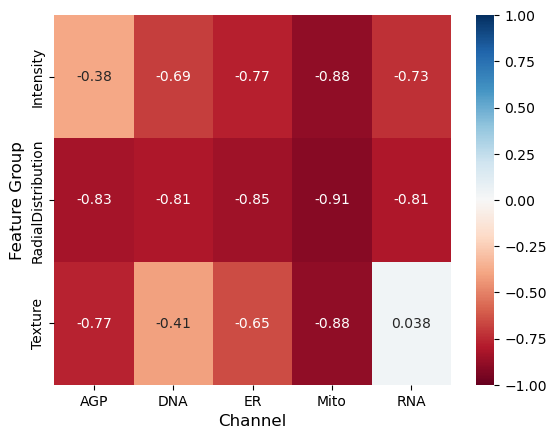

In [17]:
f = sns.heatmap(
    channel_feature_group_df,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    xticklabels=True,
    yticklabels=True,
    annot=True,
)

f.set(xlabel="Channel", ylabel="Feature Group")

f.xaxis.label.set_size(12)
f.yaxis.label.set_size(12)

plt.savefig("figures/MYT1-RNF41_feature_group_channel.png")
plt.savefig("figures/MYT1-RNF41_feature_group_channel.svg")